In [103]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
pip install ScraperFC

In [105]:
pip install highlight-text


In [106]:
pip install adjustText

In [107]:
pip install mplsoccer

In [108]:
import ScraperFC as sfc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import scipy.stats as stats
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
from mplsoccer import FontManager, add_image
from mplsoccer import Pitch

from PIL import Image
import os


In [109]:
sofascore =sfc.Sofascore()

In [110]:
aus='https://www.sofascore.com/austria-netherlands/fUbstUb#id:11873977'

In [111]:
part= sofascore.scrape_team_match_stats(aus)
part

,name,home,away,compareCode,statisticsType,valueType,homeValue,awayValue,renderType,key,period,group,homeTotal,awayTotal
0,Ball possession,52%,48%,1,positive,event,52.00,48.00,2,ballPossession,ALL,Match overview,NaN,NaN
1,Expected goals,1.73,0.95,1,positive,event,1.73,0.95,1,expectedGoals,ALL,Match overview,NaN,NaN
2,Big chances,4,2,1,positive,event,4.00,2.00,1,bigChanceCreated,ALL,Match overview,NaN,NaN
3,Total shots,11,9,1,positive,event,11.00,9.00,1,totalShotsOnGoal,ALL,Match overview,NaN,NaN
4,Goalkeeper saves,3,0,1,positive,event,3.00,0.00,1,goalkeeperSaves,ALL,Match overview,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Interceptions,1,4,2,positive,event,1.00,4.00,1,interceptionWon,2ND,Defending,NaN,NaN
117,Recoveries,25,19,1,positive,event,25.00,19.00,1,ballRecovery,2ND,Defending,NaN,NaN
118,Clearances,2,9,2,positive,event,2.00,9.00,1,totalClearance,2ND,Defending,NaN,NaN
119,Total saves,0,0,3,positive,event,0.00,0.00,1,goalkeeperSaves,2ND,Goalkeeping,NaN,NaN


In [112]:
sofascore.get_team_names(aus)

('Netherlands', 'Austria')

In [113]:
ind= sofascore.scrape_player_match_stats(aus)
ind

,name,firstName,lastName,slug,shortName,position,jerseyNumber,userCount,id,country,...,bigChanceMissed,ownGoals,dispossessed,onTargetScoringAttempt,hitWoodwork,goals,totalOffside,errorLeadToAShot,goodHighClaim,captain
0,Bart Verbruggen,,,bart-verbruggen,B. Verbruggen,G,1,2051,994363,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lutsharel Geertruida,NaN,NaN,lutsharel-geertruida,L. Geertruida,D,4,1850,856739,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stefan de Vrij,,,stefan-de-vrij,S. de Vrij,D,6,4590,91046,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Virgil van Dijk,NaN,NaN,virgil-van-dijk,V. van Dijk,D,4,57215,151545,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,Nathan Aké,NaN,NaN,nathan-ake,N. Aké,D,6,15002,149663,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tijjani Reijnders,NaN,NaN,tijjani-reijnders,T. Reijnders,M,14,4186,893549,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Jerdy Schouten,NaN,NaN,jerdy-schouten,J. Schouten,M,22,969,844234,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Joey Veerman,,,joey-veerman,J. Veerman,M,23,3470,850816,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Donyell Malen,,,donyell-malen,D. Malen,F,21,7062,803039,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Memphis Depay,,,memphis-depay,M. Depay,F,NaN,45582,138833,"{'alpha2': 'NL', 'alpha3': 'NLD', 'name': 'Net...",...,1.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [114]:
ind.columns

Index(['name', 'firstName', 'lastName', 'slug', 'shortName', 'position',
       'jerseyNumber', 'userCount', 'id', 'country', 'marketValueCurrency',
       'dateOfBirthTimestamp', 'fieldTranslations', 'shirtNumber',
       'jerseyNumber', 'position', 'substitute', 'totalPass', 'accuratePass',
       'totalLongBalls', 'accurateLongBalls', 'goalAssist', 'duelWon',
       'totalTackle', 'savedShotsFromInsideTheBox', 'saves', 'minutesPlayed',
       'touches', 'rating', 'possessionLostCtrl', 'ratingVersions',
       'goalsPrevented', 'totalCross', 'accurateCross', 'aerialLost',
       'duelLost', 'totalContest', 'bigChanceCreated', 'wasFouled', 'fouls',
       'keyPass', 'expectedAssists', 'aerialWon', 'totalClearance',
       'blockedScoringAttempt', 'outfielderBlock', 'expectedGoals',
       'interceptionWon', 'wonContest', 'shotOffTarget', 'challengeLost',
       'bigChanceMissed', 'ownGoals', 'dispossessed', 'onTargetScoringAttempt',
       'hitWoodwork', 'goals', 'totalOffside', 'erro

In [115]:
euro90=sofascore.scrape_player_league_stats('2024','Euros',accumulation='per90')
euro90

,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,hitWoodwork,offsides,expectedGoals,errorLeadToGoal,errorLeadToShot,passToAssist,player,team,player id,team id
0,0.50,0.0,0.0,5.03,71.43,0.00,0.00,2.51,83.33,1.51,...,0.0,0.00,0.11,0.0,0.0,0,Fabián Ruiz,Spain,784655,4698
1,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,NaN,0.0,0.0,0,Łukasz Skorupski,Poland,44906,4703
2,0.00,0.0,0.0,0.00,0.00,0.67,100.00,0.00,0.00,0.00,...,0.0,0.00,NaN,0.0,0.0,0,Giorgi Mamardashvili,Georgia,930997,4763
3,0.00,0.0,0.0,13.28,64.29,0.00,0.00,2.95,40.00,5.90,...,0.0,0.00,0.07,0.0,0.0,0,Bradley Barcola,France,996952,4481
4,0.33,0.0,0.0,5.33,57.14,2.00,85.71,1.67,55.56,1.67,...,0.0,0.67,0.27,0.0,0.0,0,Kevin De Bruyne,Belgium,70996,4717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,NaN,0.0,0.0,0,Norbert Gyömbér,Slovakia,224456,4697
467,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,NaN,0.0,0.0,0,Matúš Bero,Slovakia,187207,4697
468,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,NaN,0.0,0.0,0,Andreas Weimann,Austria,87185,4718
469,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,NaN,0.0,0.0,0,Jure Balkovec,Slovenia,171625,4484


In [116]:
euro=sofascore.scrape_player_league_stats('2024','Euros',accumulation='total')
euro

,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,hitWoodwork,offsides,expectedGoals,errorLeadToGoal,errorLeadToShot,passToAssist,player,team,player id,team id
0,1,0,0,10,71.43,0,0.00,5,83.33,3,...,0,0,0.22,0,0,0,Fabián Ruiz,Spain,784655,4698
1,0,0,0,0,0.00,0,0.00,0,0.00,0,...,0,0,NaN,0,0,0,Łukasz Skorupski,Poland,44906,4703
2,0,0,0,0,0.00,2,100.00,0,0.00,0,...,0,0,NaN,0,0,0,Giorgi Mamardashvili,Georgia,930997,4763
3,0,0,0,9,64.29,0,0.00,2,40.00,4,...,0,0,0.05,0,0,0,Bradley Barcola,France,996952,4481
4,1,0,0,16,57.14,6,85.71,5,55.56,5,...,0,2,0.82,0,0,0,Kevin De Bruyne,Belgium,70996,4717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0,0,0,0,0.00,0,0.00,0,0.00,0,...,0,0,NaN,0,0,0,Norbert Gyömbér,Slovakia,224456,4697
467,0,0,0,0,0.00,0,0.00,0,0.00,0,...,0,0,NaN,0,0,0,Matúš Bero,Slovakia,187207,4697
468,0,0,0,0,0.00,0,0.00,0,0.00,0,...,0,0,NaN,0,0,0,Andreas Weimann,Austria,87185,4718
469,0,0,0,0,0.00,0,0.00,0,0.00,0,...,0,0,NaN,0,0,0,Jure Balkovec,Slovenia,171625,4484


In [117]:
df_plot= euro90.merge(euro[['player','minutesPlayed']],on='player',suffixes=['_x',''])
df_plot

,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,offsides,expectedGoals,errorLeadToGoal,errorLeadToShot,passToAssist,player,team,player id,team id,minutesPlayed
0,0.50,0.0,0.0,5.03,71.43,0.00,0.00,2.51,83.33,1.51,...,0.00,0.11,0.0,0.0,0,Fabián Ruiz,Spain,784655,4698,179
1,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,0.0,0.0,0,Łukasz Skorupski,Poland,44906,4703,90
2,0.00,0.0,0.0,0.00,0.00,0.67,100.00,0.00,0.00,0.00,...,0.00,NaN,0.0,0.0,0,Giorgi Mamardashvili,Georgia,930997,4763,270
3,0.00,0.0,0.0,13.28,64.29,0.00,0.00,2.95,40.00,5.90,...,0.00,0.07,0.0,0.0,0,Bradley Barcola,France,996952,4481,61
4,0.33,0.0,0.0,5.33,57.14,2.00,85.71,1.67,55.56,1.67,...,0.67,0.27,0.0,0.0,0,Kevin De Bruyne,Belgium,70996,4717,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,0.0,0.0,0,Norbert Gyömbér,Slovakia,224456,4697,1
467,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,0.0,0.0,0,Matúš Bero,Slovakia,187207,4697,1
468,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,0.0,0.0,0,Andreas Weimann,Austria,87185,4718,1
469,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,0.0,0.0,0,Jure Balkovec,Slovenia,171625,4484,1


In [118]:
df_plot.columns

Index(['goals', 'yellowCards', 'redCards', 'groundDuelsWon',
       'groundDuelsWonPercentage', 'aerialDuelsWon',
       'aerialDuelsWonPercentage', 'successfulDribbles',
       'successfulDribblesPercentage', 'tackles', 'assists',
       'accuratePassesPercentage', 'totalDuelsWon', 'totalDuelsWonPercentage',
       'minutesPlayed_x', 'wasFouled', 'fouls', 'dispossessed', 'appearances',
       'saves', 'savedShotsFromInsideTheBox', 'savedShotsFromOutsideTheBox',
       'goalsConcededInsideTheBox', 'goalsConcededOutsideTheBox', 'highClaims',
       'successfulRunsOut', 'punches', 'runsOut', 'accurateFinalThirdPasses',
       'bigChancesCreated', 'accuratePasses', 'keyPasses', 'accurateCrosses',
       'accurateCrossesPercentage', 'accurateLongBalls',
       'accurateLongBallsPercentage', 'interceptions', 'clearances',
       'dribbledPast', 'bigChancesMissed', 'totalShots', 'shotsOnTarget',
       'blockedShots', 'goalConversionPercentage', 'hitWoodwork', 'offsides',
       'expectedGoa

In [119]:
col1='dispossessed'
col2='successfulDribbles'
df=df_plot[['player','minutesPlayed',col1,col2]]
df

,player,minutesPlayed,dispossessed,successfulDribbles
0,Fabián Ruiz,179,1.01,2.51
1,Łukasz Skorupski,90,0.00,0.00
2,Giorgi Mamardashvili,270,0.00,0.00
3,Bradley Barcola,61,0.00,2.95
4,Kevin De Bruyne,270,1.67,1.67
...,...,...,...,...
466,Norbert Gyömbér,1,0.00,0.00
467,Matúš Bero,1,0.00,0.00
468,Andreas Weimann,1,0.00,0.00
469,Jure Balkovec,1,0.00,0.00


In [120]:
df.describe()

,minutesPlayed,dispossessed,successfulDribbles
count,471.000000,471.00000,471.000000
mean,151.906582,0.81104,0.710849
std,94.101574,1.38053,1.553985
min,1.000000,0.00000,0.000000
25%,62.000000,0.00000,0.000000
50%,160.000000,0.33000,0.000000
75%,251.000000,1.09000,0.960000
max,270.000000,10.00000,19.290000


In [131]:
limite1 = 1
limite2 = 1
minutos = 140
df_plot = df[(df[col1] > limite1) & (df[col2] > limite2) & (df['minutesPlayed'] > minutos)]
df_plot

,player,minutesPlayed,dispossessed,successfulDribbles
0,Fabián Ruiz,179,1.01,2.51
4,Kevin De Bruyne,270,1.67,1.67
9,Cody Gakpo,261,1.03,1.72
17,Jamal Musiala,222,2.43,3.65
18,Kylian Mbappé,179,2.01,4.53
19,Lukáš Haraslín,207,1.30,1.30
35,Mateo Kovačić,225,2.00,2.40
42,Marcus Thuram,165,1.09,1.09
68,Florian Wirtz,197,1.37,1.83
69,Roland Sallai,267,1.69,1.01


In [132]:
df_plot['zscore'] = stats.zscore(df_plot[col1])*.4 + stats.zscore(abs(df_plot[col2]))*.6
df_plot['annotated'] = [True if x > df_plot['zscore'].quantile(.85) else False for x in df_plot['zscore']]

<ipython-input-132-14c3cc0155b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['zscore'] = stats.zscore(df_plot[col1])*.4 + stats.zscore(abs(df_plot[col2]))*.6
<ipython-input-132-14c3cc0155b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['annotated'] = [True if x > df_plot['zscore'].quantile(.85) else False for x in df_plot['zscore']]


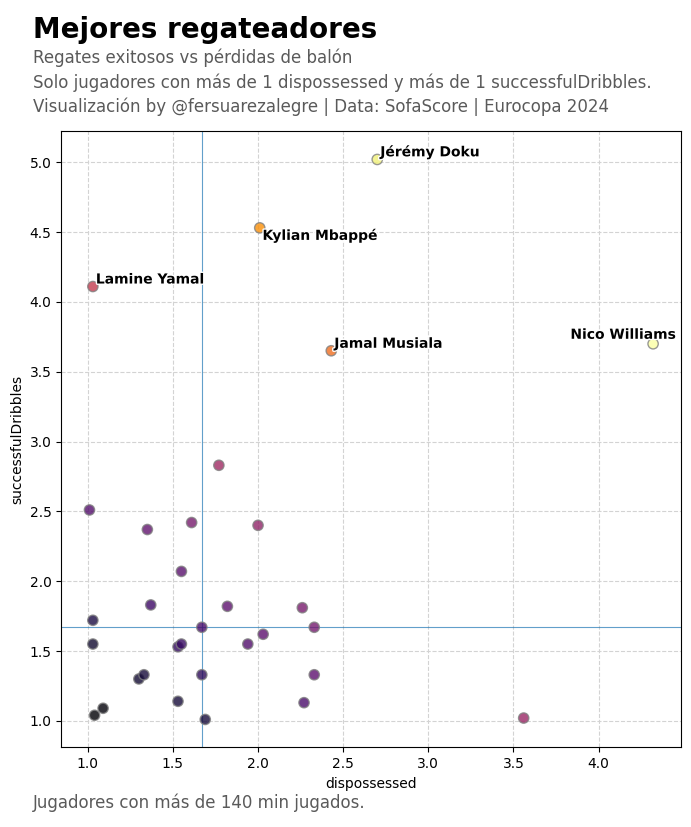

In [135]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.grid(visible=True, ls='--', color='lightgrey')
fig.set_facecolor('white')

ax.scatter(
    df_plot[col1], df_plot[col2],
    c=df_plot['zscore'], cmap='inferno',
    zorder=3, ec='grey', s=55, alpha=0.8)

texts = []
annotated_df = df_plot[df_plot['annotated']].reset_index(drop=True)
for index in range(annotated_df.shape[0]):
    texts += [
        ax.text(
            x=annotated_df[col1].iloc[index], y=annotated_df[col2].iloc[index],
            s=f"{annotated_df['player'].iloc[index]}",
            path_effects=[path_effects.Stroke(linewidth=2, foreground=fig.get_facecolor()),
            path_effects.Normal()], color='black',
            family='DM Sans', weight='bold'
        )
    ]

adjust_text(texts, only_move={'points':'y', 'text':'xy', 'objects':'xy'})

ax.set_ylabel(f'{col2}')
ax.set_xlabel(f'{col1}')
ax.axvline(df_plot[col1].median(), lw=.8, alpha=.7)
ax.axhline(df_plot[col2].median(), lw=.8, alpha=.7)


fig_text(
    x = 0.09, y = .99,
    s = "Mejores regateadores",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

fig_text(
    x = 0.09, y = 0.9,
    s = f"Regates exitosos vs pérdidas de balón\nSolo jugadores con más de {limite1} {col1} y más de {limite2} {col2}.\nVisualización by @fersuarezalegre | Data: SofaScore | Eurocopa 2024",
    va = "bottom", ha = "left",
    fontsize = 12, color = "#5A5A5A", font = "Karla"
)

fig_text(
    x = 0.09, y = 0.03,
    s = f"Jugadores con más de {minutos} min jugados.",
    va = "bottom", ha = "left",
    fontsize = 12, color = "#5A5A5A", font = "Karla"
)

plt.savefig(
	f"{col1.replace('/', '_')}_{col2.replace('/', '_')}.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)